In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
#from read_raw import load_from_file
import maxlab_analysis as mla

import time
from scipy.signal import find_peaks
import scipy.stats as stats

In [2]:
filename = "div28.data.raw.h5"

mla.recording_to_npy(filename, 0, 0)

writing frames 0 to 640000 out of 6000200
writing frames 640000 to 1280000 out of 6000200
writing frames 1280000 to 1920000 out of 6000200
writing frames 1920000 to 2560000 out of 6000200
writing frames 2560000 to 3200000 out of 6000200
writing frames 3200000 to 3840000 out of 6000200
writing frames 3840000 to 4480000 out of 6000200
writing frames 4480000 to 5120000 out of 6000200
writing frames 5120000 to 5760000 out of 6000200
writing frames 5760000 to 6000200 out of 6000200


(19600, 863)
(19600,)


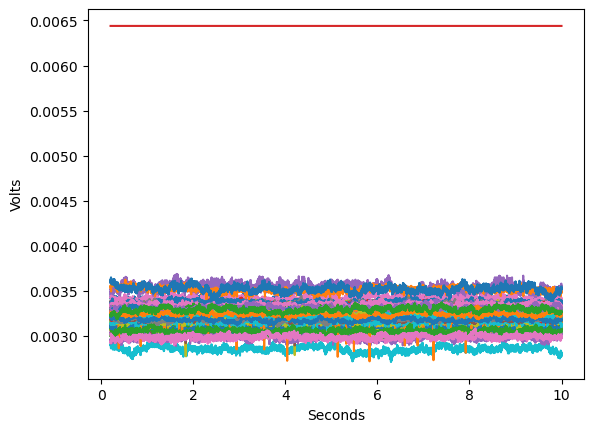

In [3]:

X, t = mla.load_from_file(filename, 0, 0, 0.2, 10 , 2000)
print(np.shape(X))
print(np.shape(t))
plt.plot(t,X[:,:]);
plt.ylabel('Volts');
plt.xlabel('Seconds');


plt.show()

# plt.savefig('plot.png')

In [4]:
Y = mla.load_spikes_from_file(filename, 0, 0, -10)
print(np.shape(Y))

(49973, 3)


time taken: 12.592232704162598 s
           time channel  amplitude
17449  25.83575     391 -12.936186
17450  25.83880     903 -11.478186
17451  25.83880     874 -12.251131
17453  25.83925     342 -40.823868
17455  25.84540     888 -30.218239
     time  fraction channels active
0  25.825                  0.186275
1  27.075                  0.223529
2  27.975                  0.288235
3  28.750                  0.292157
4  29.500                  0.150980


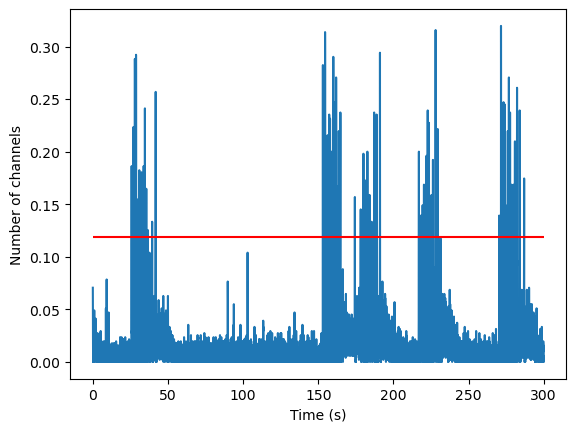

In [ ]:
start_time = time.time()
Y_synchronized, spike_times = mla.find_synchronized_spikes(Y, plot_firing = True)
end_time = time.time()
print('time taken: ' + str(end_time - start_time) + ' s')
print(Y_synchronized.head())
print(spike_times.head())

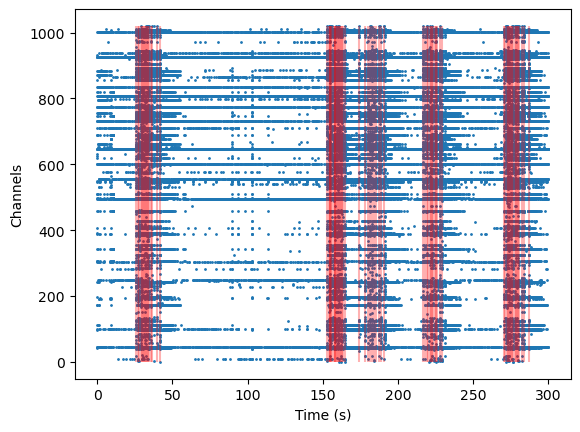

In [ ]:
plt.figure()
plt.scatter(Y['time'], Y['channel'], 1)
#plt.scatter(Y_synchronized['frameno'], Y_synchronized['channel'], 1, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Channels')
plt.vlines(spike_times['time'], 0, max(Y['channel']), 'red', alpha=0.3)

In [ ]:
spike_diffs = spike_times.diff().dropna()
num_bins = 'auto'

Text(0, 0.5, '$P(IBI) < t$')

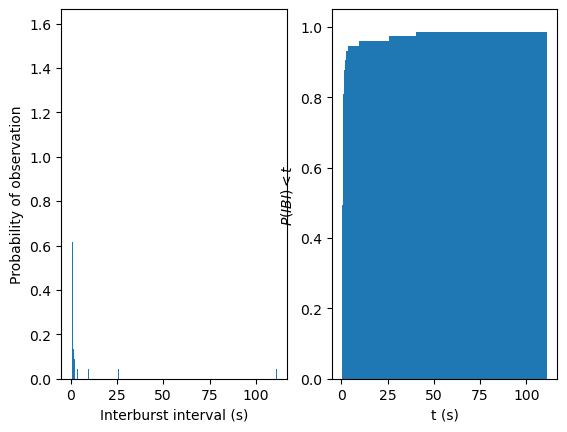

In [ ]:
#num_bins = 1000

plt.figure()
plt.subplot(121)
plt.hist(spike_diffs['time'], num_bins, density = True)
plt.xlabel('Interburst interval (s)')
plt.ylabel('Probability of observation')


plt.subplot(122)
plt.hist(spike_diffs['time'], num_bins, density = True, cumulative = True)
plt.xlabel('t (s)')
plt.ylabel('$P(IBI) < t$')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


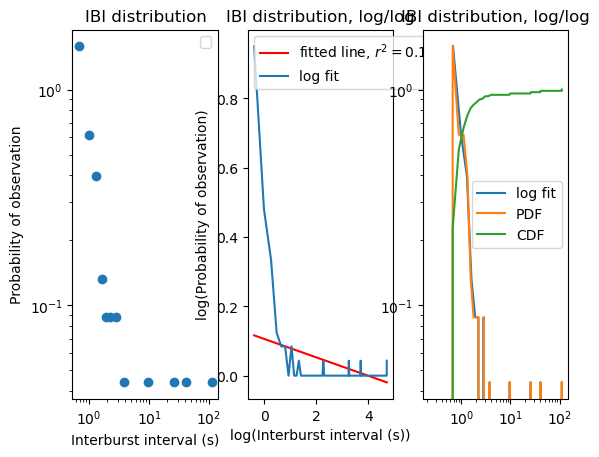

In [ ]:
IBI_hist = np.histogram(spike_diffs['time'], bins = num_bins, density = True)
(IBI_data, IBI_bins) = IBI_hist
IBI_bin_midpoints = [(a + b) /2 for a,b in zip(IBI_bins[:-1], IBI_bins[1:])]

hist_dist = stats.rv_histogram(IBI_hist, density = True)
X = np.linspace(0, max(spike_diffs['time']), 500)

plt.figure()
plt.subplot(131)
plt.title('IBI distribution')
plt.scatter(IBI_bin_midpoints, IBI_data)
#plt.plot(X, hist_dist.pdf(X), label= 'PDF')
#plt.plot(X, hist_dist.cdf(X), label= 'CDF')

plt.legend()

plt.xlabel('Interburst interval (s)')
plt.ylabel('Probability of observation')
plt.yscale('log')
plt.xscale('log')

plt.subplot(132)
#NOTE - THIS NAN_TO_NUM THING IS HAPPENING
log_IBI_bin_midpoints = np.log(IBI_bin_midpoints)
log_IBI_data = np.log1p(IBI_data)

fit = stats.linregress(log_IBI_bin_midpoints, log_IBI_data)
plt.plot(log_IBI_bin_midpoints, fit.intercept + fit.slope*log_IBI_bin_midpoints, 'r', label=f'fitted line, $r^2 = {fit.rvalue**2:.2f}$')

plt.title('IBI distribution, log/log')
#plt.hist(spike_diffs['time'], num_bins, density = True)
plt.plot(log_IBI_bin_midpoints, log_IBI_data, label = "log fit")
#plt.loglog(X, hist_dist.pdf(X), label= 'PDF')
#plt.loglog(X, hist_dist.cdf(X), label= 'CDF')

plt.legend()

plt.xlabel('log(Interburst interval (s))')
plt.ylabel('log(Probability of observation)')

plt.subplot(133)
plt.title('IBI distribution, log/log')
#plt.hist(spike_diffs['time'], num_bins, density = True)
plt.loglog(IBI_bin_midpoints, IBI_data, label = "log fit")
plt.loglog(X, hist_dist.pdf(X), label= 'PDF')
plt.loglog(X, hist_dist.cdf(X), label= 'CDF')

plt.legend()

#plt.xlabel('log(Interburst interval (s))')
#plt.ylabel('log(Probability of observation)')

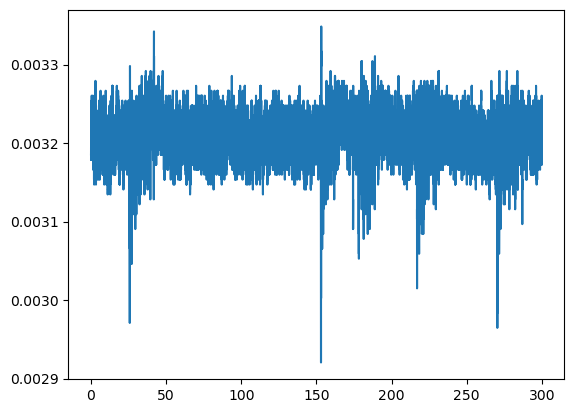

In [12]:
data_from_npy = np.load(filename + '.npy', mmap_mode = 'r')
plt.plot(data_from_npy[:, 0], data_from_npy[:, 1])